In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

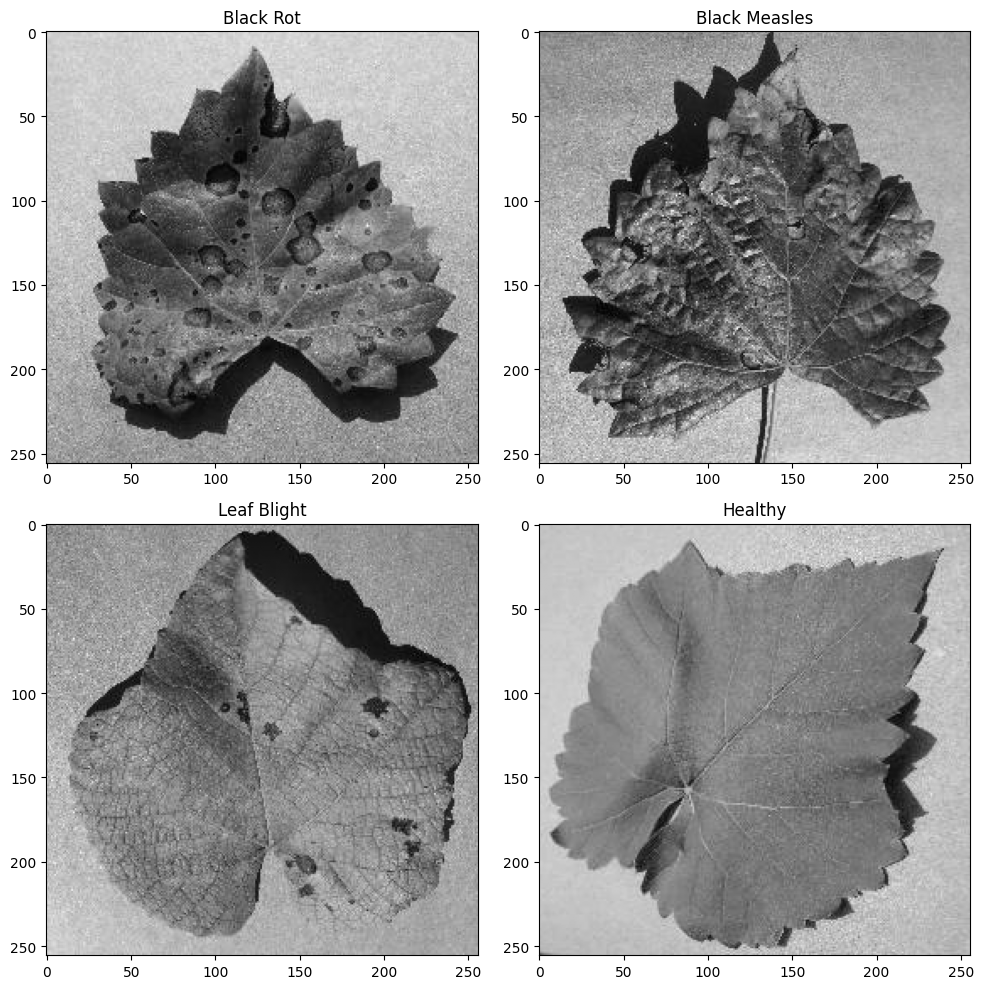

In [3]:
blackRot = plt.imread('Dataset/BlackRot.jpg')
blackMeasles = plt.imread('Dataset/BlackMeasles.jpg')
leafBlight = plt.imread('Dataset/LeafBlight.jpg')
healthy = plt.imread('Dataset/Healthy.jpg')

blackRot = cv2.cvtColor(blackRot, cv2.COLOR_RGB2GRAY)
blackMeasles = cv2.cvtColor(blackMeasles, cv2.COLOR_RGB2GRAY)
leafBlight = cv2.cvtColor(leafBlight, cv2.COLOR_RGB2GRAY)
healthy = cv2.cvtColor(healthy, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(blackRot, cmap='gray')
plt.title('Black Rot')
plt.subplot(2, 2, 2)
plt.imshow(blackMeasles, cmap='gray')
plt.title('Black Measles')
plt.subplot(2, 2, 3)
plt.imshow(leafBlight, cmap='gray')
plt.title('Leaf Blight')
plt.subplot(2, 2, 4)
plt.imshow(healthy, cmap='gray')
plt.title('Healthy')
plt.tight_layout()
plt.show()

In [4]:
def equalization(img):
    h, w = img.shape
    total = h * w

    hist = [0] * 256
    for i in range(h):
        for j in range(w):
            value = img[i, j]
            hist[value] += 1

    cdf = [0] * 256
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]

    cdf_min = min(x for x in cdf if x > 0)
    new_val = [0] * 256
    for i in range(256):
        new_val[i] = round((cdf[i] - cdf_min) / (total - cdf_min) * 255)

    result = np.zeros((h, w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            result[i, j] = new_val[img[i, j]]

    return result

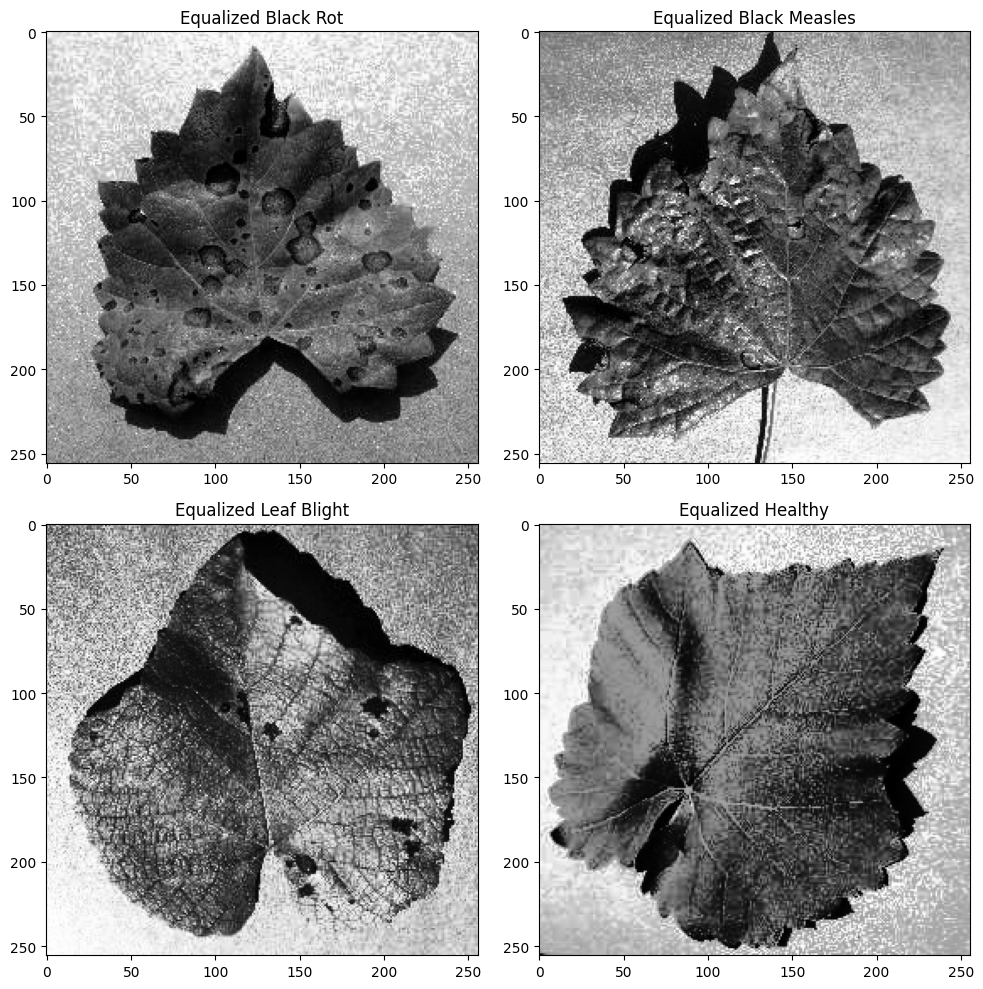

In [5]:
equalized_blackRot = equalization(blackRot)
equalized_blackMeasles = equalization(blackMeasles)
equalized_leafBlight = equalization(leafBlight)
equalized_healthy = equalization(healthy)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(equalized_blackRot, cmap='gray')
plt.title('Equalized Black Rot')
plt.subplot(2, 2, 2)
plt.imshow(equalized_blackMeasles, cmap='gray')
plt.title('Equalized Black Measles')
plt.subplot(2, 2, 3)
plt.imshow(equalized_leafBlight, cmap='gray')
plt.title('Equalized Leaf Blight')
plt.subplot(2, 2, 4)
plt.imshow(equalized_healthy, cmap='gray')
plt.title('Equalized Healthy')
plt.tight_layout()
plt.show()


In [ ]:
def convolution(img, kernel):
    size = kernel.shape[0]
    pad_size = size // 2
    padded = np.pad(img, pad_size, mode='constant')
    canvas = np.zeros_like(img).astype(np.float32)
    height, width = img.shape

    for i in range(height):
        for j in range(width):  
            region = padded[i:i+size, j:j+size]
            canvas[i, j] = np.sum(region * kernel)
    return canvas

In [8]:
def median(img, size):
    pad = size // 2
    padded = np.pad(img, pad, mode='edge')
    height, width = img.shape
    result = np.zeros_like(img)
    
    for i in range(height):
        for j in range(width):
            region = padded[i:i+size, j:j+size]
            result[i,j] = np.sort(region.ravel())[size*size//2]
    
    return result

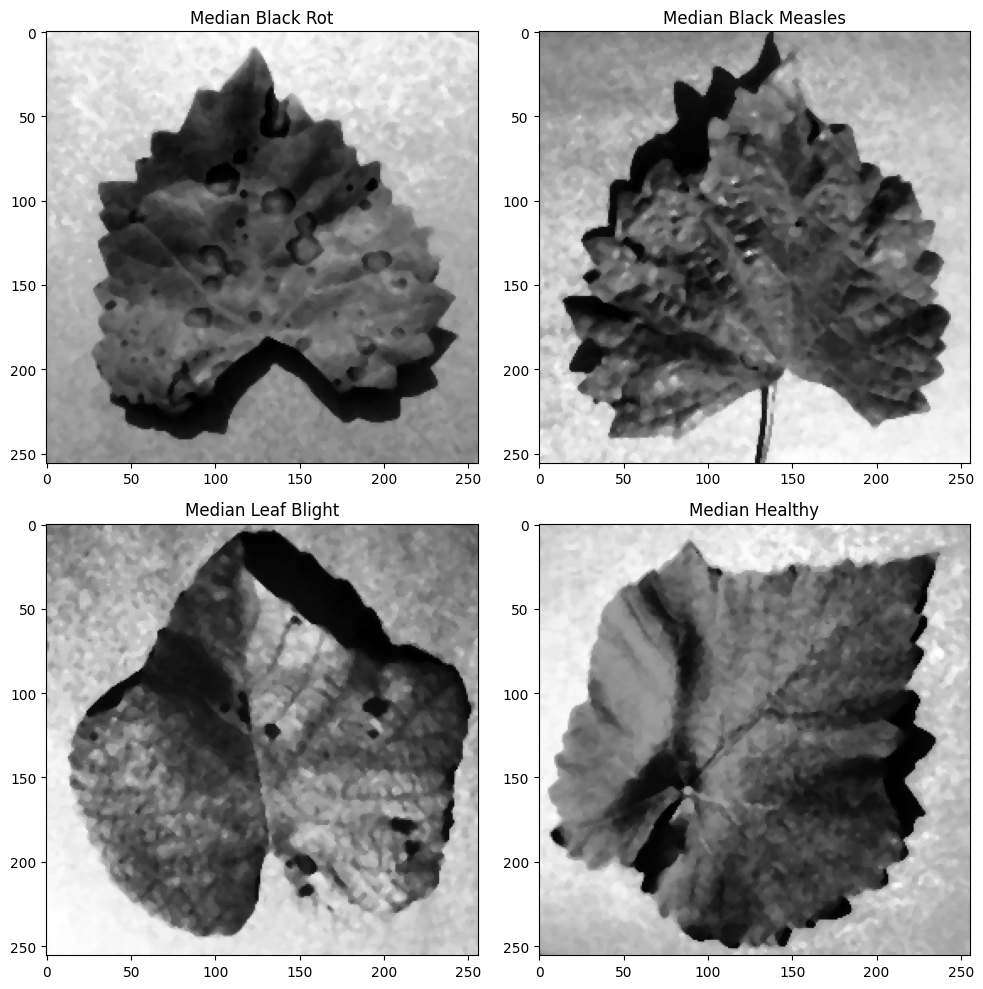

In [9]:
blackRot_mid = median(median(median(equalized_blackRot, 3), 3), 3)
blackMeasles_mid = median(median(median(equalized_blackMeasles, 3), 3), 3)
leafBlight_mid = median(median(median(equalized_leafBlight, 3), 3), 3)
healthy_mid = median(median(median(equalized_healthy, 3), 3), 3)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(blackRot_mid, cmap='gray')
plt.title('Median Black Rot')
plt.subplot(2, 2, 2)
plt.imshow(blackMeasles_mid, cmap='gray')
plt.title('Median Black Measles')
plt.subplot(2, 2, 3)
plt.imshow(leafBlight_mid, cmap='gray')
plt.title('Median Leaf Blight')
plt.subplot(2, 2, 4)
plt.imshow(healthy_mid, cmap='gray')
plt.title('Median Healthy')
plt.tight_layout()
plt.show()

In [10]:
def edge(img, kernelx, kernely):
    gx = convolution(img, kernelx)
    gy = convolution(img, kernely)
    canvas = np.zeros_like(img, dtype=np.float32)
    canvas = np.abs(gx) + np.abs(gy)
    canvas = canvas * 255.0 / np.max(canvas)
    
    return np.clip(canvas, 0, 255).astype(np.uint8)

sobelx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)
sobely = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1,-2,-1]
], dtype=np.float32)

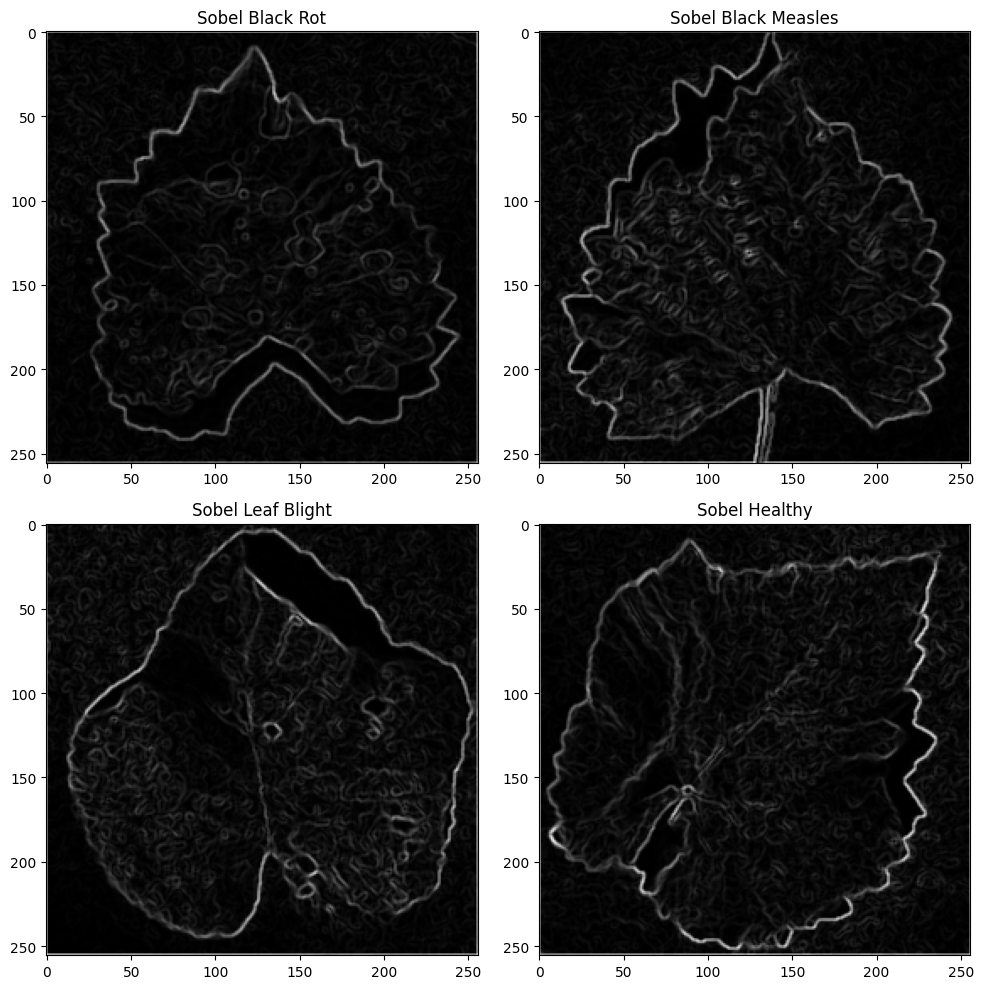

In [11]:
blackRot_sobel = edge(blackRot_mid, sobelx, sobely)
blackMeasles_sobel = edge(blackMeasles_mid, sobelx, sobely)
leafBlight_sobel = edge(leafBlight_mid, sobelx, sobely)
healthy_sobel = edge(healthy_mid, sobelx, sobely)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(blackRot_sobel, cmap='gray')
plt.title('Sobel Black Rot')
plt.subplot(2, 2, 2)
plt.imshow(blackMeasles_sobel, cmap='gray')
plt.title('Sobel Black Measles')
plt.subplot(2, 2, 3)
plt.imshow(leafBlight_sobel, cmap='gray')
plt.title('Sobel Leaf Blight')
plt.subplot(2, 2, 4)
plt.imshow(healthy_sobel, cmap='gray')
plt.title('Sobel Healthy')
plt.tight_layout()
plt.show()

In [12]:
def threshold(image, threshold_value):
    binary = np.where(image > threshold_value, 255, 0).astype(np.uint8)
    return binary

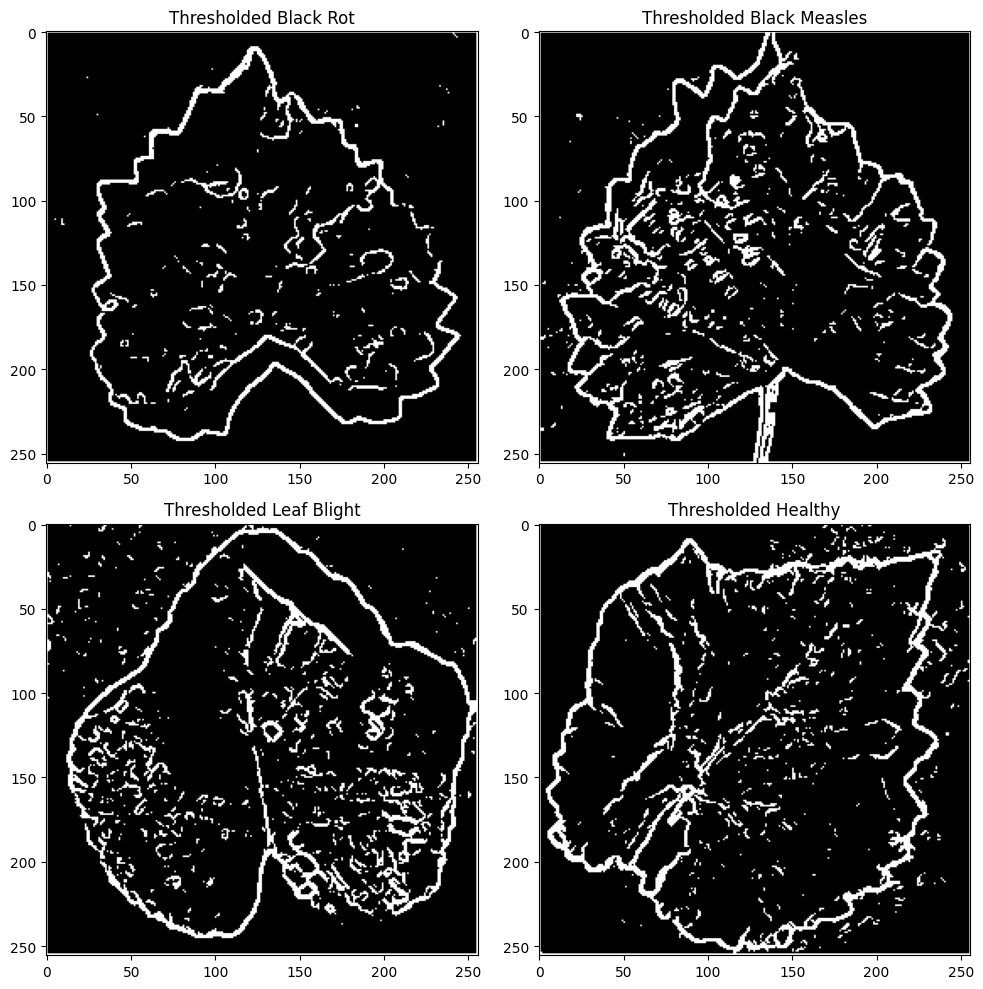

In [13]:
thresholded_blackRot = threshold(blackRot_sobel, 30)
thresholded_blackMeasles = threshold(blackMeasles_sobel, 30)
thresholded_leafBlight = threshold(leafBlight_sobel, 30)
thresholded_healthy = threshold(healthy_sobel, 30)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(thresholded_blackRot, cmap='gray')
plt.title('Thresholded Black Rot')
plt.subplot(2, 2, 2)
plt.imshow(thresholded_blackMeasles, cmap='gray')
plt.title('Thresholded Black Measles')
plt.subplot(2, 2, 3)
plt.imshow(thresholded_leafBlight, cmap='gray')
plt.title('Thresholded Leaf Blight')
plt.subplot(2, 2, 4)
plt.imshow(thresholded_healthy, cmap='gray')
plt.title('Thresholded Healthy')
plt.tight_layout()
plt.show()
